# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
import string
import re  
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from nltk.stem import PorterStemmer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

# **Reading DataSet**

In [2]:
df = pd.read_csv("/kaggle/input/spam-detectionnnn/spam.csv" , encoding="latin-1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


# **Data Cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.rename({'v1':'Label','v2':'Message'},axis=1,inplace=True) 

In [6]:
df

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [8]:
df

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.duplicated().sum()

403

In [11]:
df = df.drop_duplicates()
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.duplicated().sum()

0

In [13]:
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [14]:
df.shape

(5169, 2)

In [15]:
df.loc[:,'Label']=df.Label.map({'ham':0, 'spam':1}) #changing target column
df

,Label,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# **Data PreProcessing**

In [16]:
def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

In [17]:
stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

def cleaning_data(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'.pic\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    text = " ".join([i for i in words if i not in stop_words and len(i) > 2])
    text = re.sub(r"\s+", " ", text).strip()
    return text

df["CleanMessage"] = df["Message"].apply(cleaning_data)

In [18]:
df.head()

,Label,Message,CleanMessage
0,0,"Go until jurong point, crazy.. Available only ...",jurong point crazy available bugis great world...
1,0,Ok lar... Joking wif u oni...,lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win cup final tkts may te...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


# **EDA**

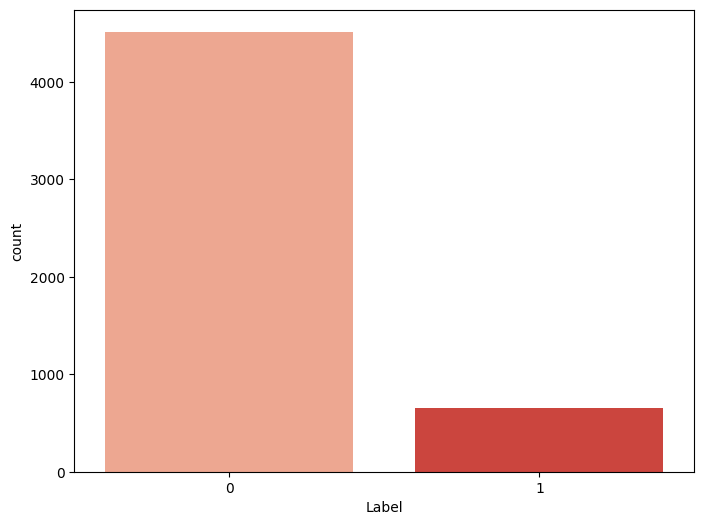

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Label", data=df, palette="Reds")
plt.show()

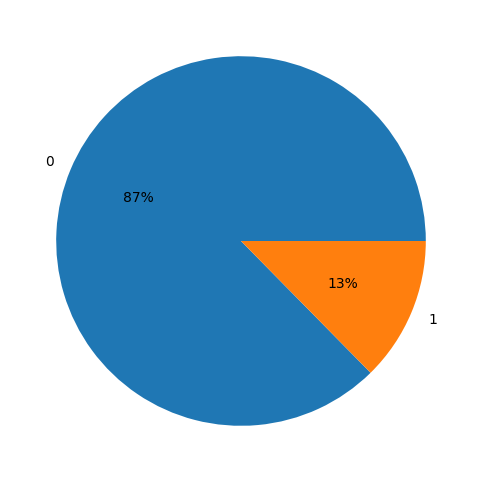

In [20]:
plt.figure(figsize=(8, 6))
kind_counts = df["Label"].value_counts()
plt.pie(kind_counts, labels=kind_counts.index, autopct="%0.0f%%")
plt.show()

# **Word Cloud**

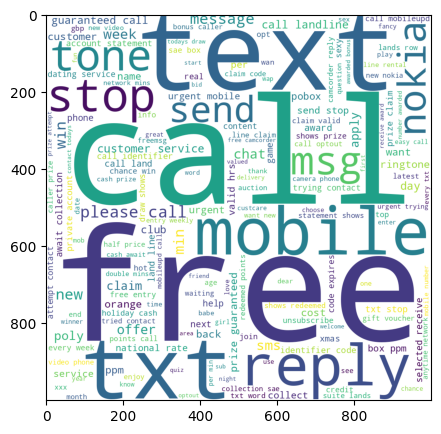

In [21]:
wordcloud = WordCloud(width=1000,height=1000,min_font_size=15,background_color='white')
spam =wordcloud.generate(df[df['Label'] == 1]['CleanMessage'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(spam)
plt.show()

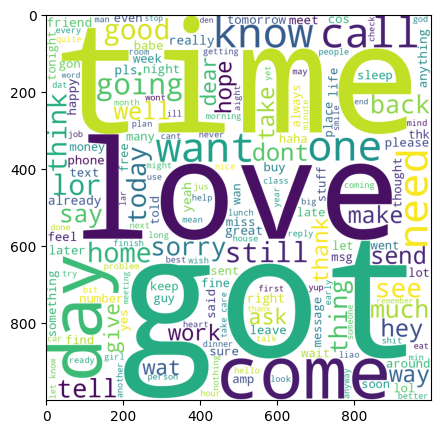

In [22]:
wordcloud = WordCloud(width=1000,height=1000,min_font_size=15,background_color='white')
ham =wordcloud.generate(df[df['Label'] == 0]['CleanMessage'].str.cat(sep = " "))
plt.figure(figsize=(8,5))
plt.imshow(ham)
plt.show()

# **Building Model**

In [23]:
# TfidfVectorizer for "CleanMessage" column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["CleanMessage"])

# OneHotEncoder for "kind" column
encoder = OneHotEncoder(sparse=False, drop='first')
Y = encoder.fit_transform(df[["Label"]])
X_combined = np.hstack((X.toarray(), Y))

print(X_combined)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [24]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# **1- MultinomialNB**

In [25]:
model = MultinomialNB()
model.fit(X_train,Y_train)

MultinomialNB()

In [26]:
model.score(X_train,Y_train)

0.9660033167495854

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [28]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9535783365570599


# **RandomForestClassifier**

In [29]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)

RandomForestClassifier()

In [30]:
model.score(X_train,Y_train)

0.9997236042012161

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.970341715022566


# **KNeighborsClassifier**

In [33]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [34]:
model.score(X_train,Y_train)

0.9378109452736318

In [35]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.90715667311412


# **DecisionTreeClassifier**

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [38]:
model.score(X_train,Y_train)

0.9997236042012161

In [39]:
y_pred = model.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9632495164410058


***RandomForestClassifier has the highest accuracy***

In [41]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
def predict_Mail(model, message, vectorizer):
    input_features = vectorizer.transform([message])
    prediction = model.predict(input_features)
    return "Spam" if prediction == 1 else "Ham"

In [42]:
test_mail1 = "Hello there,Are you looking to supplement your income? I've got the perfect opportunity for you!Our company is hiring independent contractors to work from the comfort of their own homes. You can earn up to $5,000 per month simply by stuffing envelopes or completing other simple tasks. No experience necessary!This is a limited-time offer, so don't miss out. Sign up today and start earning extra money right away.Click here to get started >> [Suspicious Link]Hurry, spots are filling up fast!Best regards,"
print(f"Message: '{test_mail1}' is classified as {predict_Mail(model, test_mail1, vectorizer)}")

Message: 'Hello there,Are you looking to supplement your income? I've got the perfect opportunity for you!Our company is hiring independent contractors to work from the comfort of their own homes. You can earn up to $5,000 per month simply by stuffing envelopes or completing other simple tasks. No experience necessary!This is a limited-time offer, so don't miss out. Sign up today and start earning extra money right away.Click here to get started >> [Suspicious Link]Hurry, spots are filling up fast!Best regards,' is classified as Ham


In [43]:
test_mail1 = "Subject: Attention! You've won the lottery!Dear [Recipient],Congratulations! You have been selected as the winner of our company's annual $1 million lottery drawing. All you need to do to claim your prize is to provide your personal banking information, including your account number and routing number, so that we can directly deposit the funds into your account.This is a once-in-a-lifetime opportunity that you cannot afford to miss. Act now before the deadline expires, and the prize is awarded to someone else.Please respond immediately to claim your winnings.Sincerely,[Sender Name]Lottery CoordinatorABC Enterprises"

print(f"Message: '{test_mail1}' is classified as {predict_Mail(model, test_mail1, vectorizer)}")

Message: 'Subject: Attention! You've won the lottery!Dear [Recipient],Congratulations! You have been selected as the winner of our company's annual $1 million lottery drawing. All you need to do to claim your prize is to provide your personal banking information, including your account number and routing number, so that we can directly deposit the funds into your account.This is a once-in-a-lifetime opportunity that you cannot afford to miss. Act now before the deadline expires, and the prize is awarded to someone else.Please respond immediately to claim your winnings.Sincerely,[Sender Name]Lottery CoordinatorABC Enterprises' is classified as Spam
